In [2]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot,glrt, ci_plot
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="value"
data=get_dataset(dataset_name="fig5_full_anon")

✅ Loading data done                                                                                 


In [3]:

loss="normalized_regret"
wins_zone_x_bench=pd.DataFrame()
wins_bench=pd.DataFrame()
budget_zones=[[1,6],[6,12],[12,18],[18,24]]
ds=data.loc[(data[algorithm].isin(["A-0","A-2"]))&(data[budget].between(1,24))] #PB, HB
wins_zone_x_bench[benchmark]=list(ds[benchmark].unique())

full_wins=[]
full_scores=[]
full_benchmarks=[]
full_zones=[]
full_fidelities=[]
for f in ds[budget].unique():
    print(f)
    wins_budget=[]
    for bench in ds[benchmark].unique():
        full_fidelities.append(f)
        mod=model(f"{loss}~{algorithm}",ds.loc[(ds[budget].between(f,f+0.5))&(ds[benchmark]==bench)],algorithm)
        post_hocs=mod.post_hoc(algorithm)
        if post_hocs[1].Sig[0] in ["***","**","*"]:
            wins_budget.append(-1 if post_hocs[1].Contrast[0].rsplit(" - ")[0 if post_hocs[1].Estimate[0]<0 else 1]=="(A-2)" else 1)
            full_wins.append(-1 if post_hocs[1].Contrast[0].rsplit(" - ")[0 if post_hocs[1].Estimate[0]<0 else 1]=="(A-2)" else 1)
            full_scores.append(post_hocs[1].Estimate[0])
        else:
            wins_budget.append(0) 
            full_wins.append(0)
            full_scores.append(0)
        full_benchmarks.append(bench)
        if f==24:
            full_zones.append(f"{budget_zones[-1][0]}_{budget_zones[-1][1]}")
        for zone in budget_zones:
            if f>=zone[0] and f<zone[1]:
                full_zones.append(f"{zone[0]}_{zone[1]}")  


1.0


Exception ignored from cffi callback <function _callback at 0x00000242431E52D0>:
Traceback (most recent call last):
  File "c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 330, in _callback
    callback()
  File "c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 319, in callback
    def callback() -> None:
KeyboardInterrupt: 


1.01923077


In [ ]:
wins_bench[benchmark]=full_benchmarks
wins_bench["wins"]=full_wins
wins_bench["scores"]=full_scores
wins_bench["fidelity"]=full_fidelities

wins_bench["zone"]=full_zones

print(wins_zone_x_bench)
print(wins_bench)

   bench_prior
0      B-0_bad
1     B-1_at25
2      B-2_bad
3     B-3_at25
4     B-4_at25
5     B-2_at25
6     B-0_at25
7      B-5_bad
8     B-6_at25
9      B-7_bad
10     B-8_bad
11     B-9_bad
12    B-9_at25
13   B-10_at25
14     B-1_bad
15    B-7_at25
16    B-11_bad
17     B-3_bad
18    B-8_at25
19   B-11_at25
20     B-6_bad
21    B-10_bad
22     B-4_bad
23    B-5_at25
    bench_prior  wins  scores  fidelity   zone
0       B-0_bad     1   0.745         1    1_6
1      B-1_at25    -1  -0.290         1    1_6
2       B-2_bad     1   0.782         1    1_6
3      B-3_at25    -1  -0.402         1    1_6
4      B-4_at25    -1  -0.308         1    1_6
5      B-2_at25    -1  -0.031         1    1_6
6      B-0_at25     0   0.000         1    1_6
7       B-5_bad     1   0.608         1    1_6
8      B-6_at25    -1  -0.356         1    1_6
9       B-7_bad     1   0.770         1    1_6
10      B-8_bad     1   0.793         1    1_6
11      B-9_bad     1   0.673         1    1_6
12     B-9_at2

In [1]:
print(wins_bench)

NameError: name 'wins_bench' is not defined

boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates


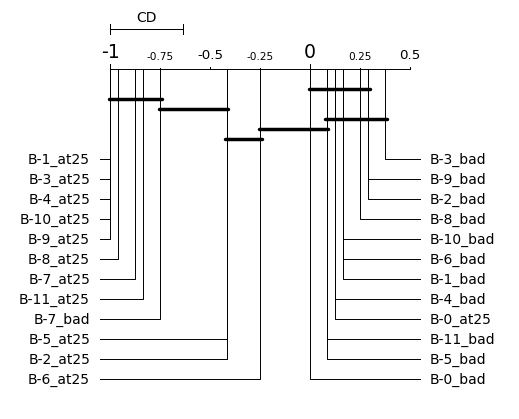

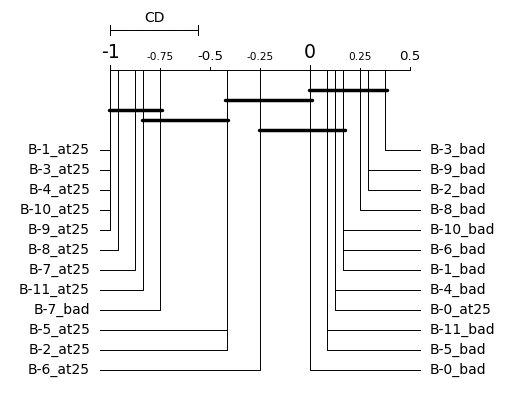

In [ ]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)
wins_bench.to_csv("wins_bench.csv")
wins_model=model(f"wins~{benchmark}+fidelity",wins_bench,benchmark)
cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)
wins_model=model(f"wins~{benchmark}",wins_bench,benchmark)
cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)


P-values adjusted by tukey method for family of 276 estimates
P-values adjusted by tukey method for family of 276 estimates


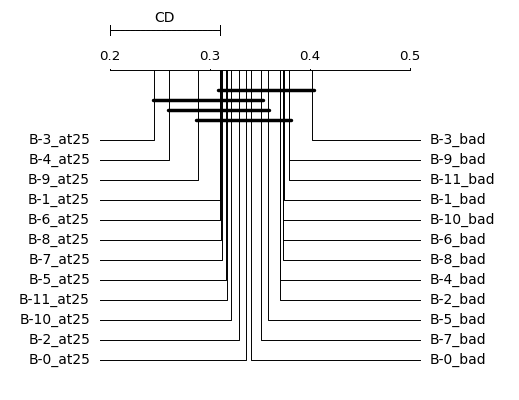

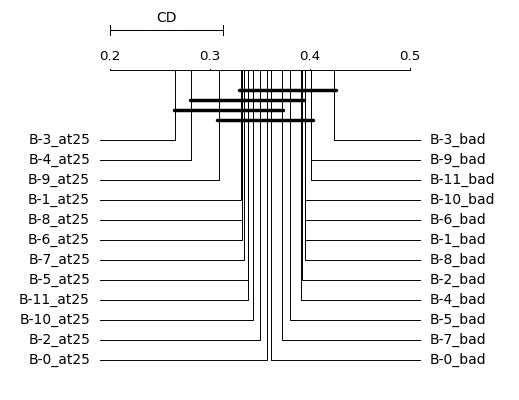

In [ ]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)


wins_model=model(f"scores~{benchmark}+fidelity",wins_bench,benchmark)
cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)
wins_model=model(f"scores~{benchmark}",wins_bench,benchmark)
cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)

boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates


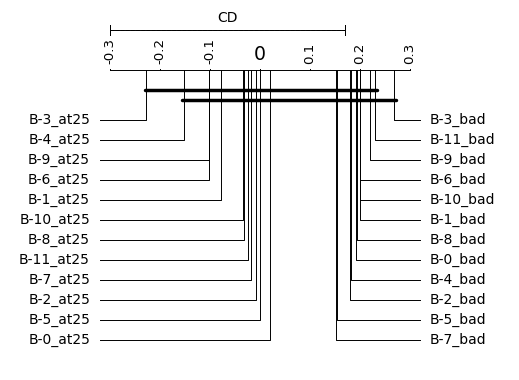

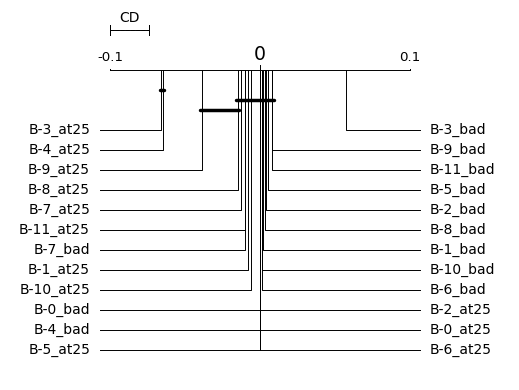

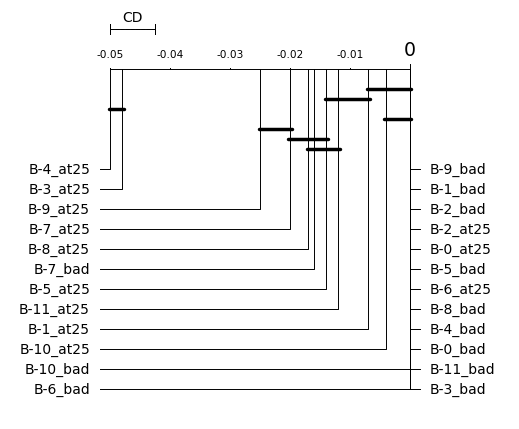

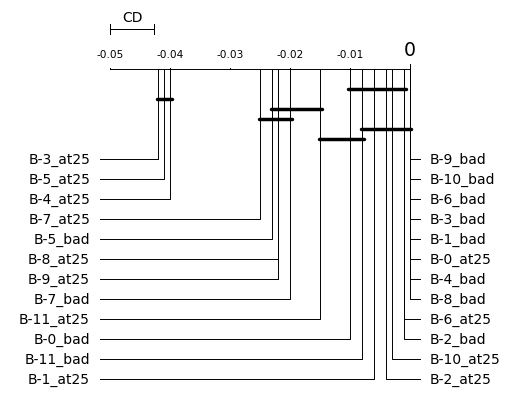

In [ ]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)


# print(wins_model.summary())
# print(wins_model.post_hoc(benchmark,grouping_vars=["zone"]))
for zone in wins_bench["zone"].unique():
    # print(post_1.loc[post_1[benchmark]==zone[0]])
    # print(post_2.loc[post_2[benchmark]==zone[0]])
    # print(wins_bench.loc[wins_bench["zone"]==zone])
    wins_model=model(f"scores~{benchmark}",wins_bench.loc[wins_bench["zone"]==zone],benchmark)
    cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\autorank\_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\autorank\_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


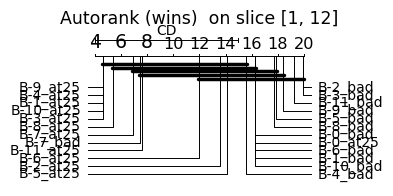

In [ ]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)

# wins_model=model(f"scores~{benchmark}+fidelity+zone",wins_bench,benchmark,factor="zone")
# print(wins_model.summary())
# print(wins_model.post_hoc(benchmark,grouping_vars=["zone"]))

# post_1,post_2=wins_model.post_hoc(benchmark,grouping_vars=["zone"])
# for zone in wins_bench["zone"].unique():
    # print(post_1.loc[post_1[benchmark]==zone[0]])
    # print(post_2.loc[post_2[benchmark]==zone[0]])
    # cd_diagram((post_1.loc[post_1["zone"]==zone],post_2.loc[post_2["zone"]==zone]),False,5,system_id=benchmark)

plot_x=bt_plot([[1,12]],1,wins_bench,benchmark,"fidelity")
plot_x.change_row(0,None,loss="wins")#f"scores~{benchmark}",globality=False,loss="wins")
plot_x.show()